<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Extens%C3%A3o-DS/01%20-%20KNN/T%C3%B3pico%2003%20-%20Aprendizado%20Supervisionado%20-%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial KNN

Neste tutorial, iniciaremos nossas práticas de aprendizado de máquina utilizando a biblioteca scikit-learn, que é uma das principais ferramentas de aprendizado de máquina em Python.

Dentre os algoritmos de classificação disponíveis nesta biblioteca, vamos começar com o KNN, que significa "K-Nearest Neighbors" ou "K-Vizinhos Mais Próximos". Esse algoritmo é um dos mais simples e populares da área de aprendizado de máquina.

O KNN é um método não-paramétrico de classificação, ou seja, ele não assume nada sobre a distribuição dos dados. O funcionamento do algoritmo se baseia na ideia de que amostras semelhantes tendem a estar próximas umas das outras no espaço de atributos.

Dado um conjunto de dados de treinamento com amostras já classificadas, o KNN determina a classe de uma amostra de teste a partir dos K vizinhos mais próximos a ela no espaço de atributos. A classe da amostra de teste é determinada por voto majoritário entre as classes dos seus K vizinhos mais próximos.

Abaixo ilustra-se o KNN:

> > > > > 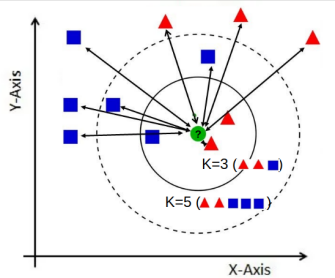

#Dataset sintético

  Utilizamos a função make_blobs() para criar uma distribuição de dados que será usada para avaliar o desempenho do KNN. Essa função permite criar conjuntos de dados artificiais com uma determinada quantidade de centroídes e diferentes desvios-padrão.

No entanto, mais adiante no tutorial, produziremos distribuições de dados mais complexas, que permitirão avaliar o desempenho do KNN em situações mais desafiadoras. Dessa forma, poderemos entender melhor as limitações e os pontos fortes do algoritmo, bem como explorar diferentes técnicas para melhorar sua eficiência.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

random_seed=9999

#centro de massa da distribuição
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)


[1.88251299 0.21776835] 0
[-0.14158407  0.56091061] 0
[8.23809819 5.45613494] 1
[ 2.38615696 12.5106381 ] 2
[ 3.37055279 12.60774395] 2
[ 3.17995786 11.41664478] 2
[ 4.38621013 12.4870083 ] 2
[-0.19880191  4.93170517] 0
[1.11984837 2.18259889] 0
[7.23151031 4.51579089] 1


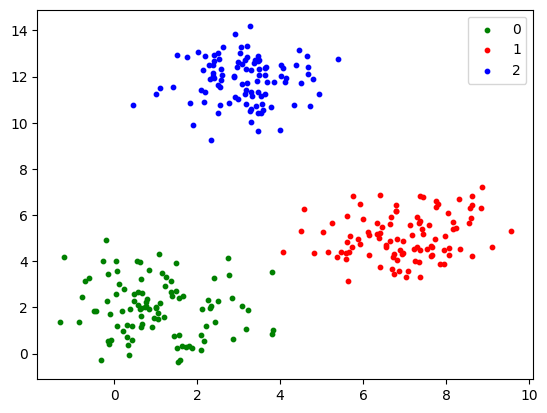

In [2]:
#Exibição
colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

#Preparação dos dados

Uma etapa crucial no aprendizado de máquina é a preparação dos dados. Esta etapa inclui normalmente:


*   Análise Exploratória
*   Normalização
*   Método de Validação





##Holdout (Train-Val | Test)

In [3]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)



Avaliação Geral

In [4]:
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

#Criação do modelo com seus hiper-parâmetros


*   Distância
*   K-Vizinhos




In [5]:
from sklearn.neighbors import KNeighborsClassifier


#p=1 ~ Manhattan Distance
#p=2 ~ Euclidean
#p!=1|2 ~ minkowski
knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)


KNeighborsClassifier()

#Teste do modelo

In [6]:
#computa as classes para todos
predicts = knn.predict(test_data)

from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels,predicts)
print(acc)

1.0


###Metricas de Avaliação
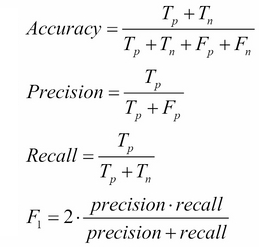

In [7]:
from sklearn.metrics import accuracy_score
example_predictions = [0, 2, 1, 3, 2, 0, 1, 2, 0]
example_labels      = [0, 2, 2, 3, 2, 1, 1, 1, 1]
acc = accuracy_score(example_labels,example_predictions)
print(f'Acc: {acc}')

Acc: 0.5555555555555556


In [8]:
from sklearn.metrics import classification_report
print(classification_report(example_labels,example_predictions))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.25      0.33         4
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         1

    accuracy                           0.56         9
   macro avg       0.62      0.73      0.62         9
weighted avg       0.59      0.56      0.54         9



#Analise Crítica
Vamos analisar o desempenho do KNN quanto:


*   Distribuição
*   K Vizinhos
*   Quantidade de amostras




(500, 2) (500,)
[4.2157609  6.30888746] 1
[4.926646   6.73941054] 2
[4.78495885 3.697368  ] 1
[4.99486723 2.69294982] 1
[4.11158308 6.03087108] 0
[2.8351227  3.84602613] 1
[3.49869787 4.98263651] 1
[6.71944442 7.19246299] 2
[4.96288295 5.60379066] 1
[6.82563575 6.70603371] 2


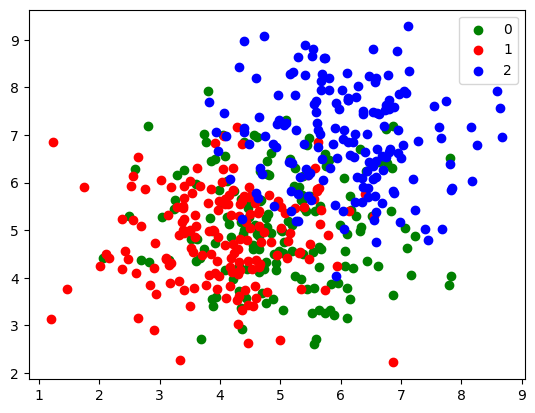


Acc: 0.56

              precision    recall  f1-score   support

           0       0.44      0.32      0.37        57
           1       0.51      0.67      0.58        48
           2       0.74      0.76      0.75        45

    accuracy                           0.56       150
   macro avg       0.56      0.58      0.56       150
weighted avg       0.55      0.56      0.55       150



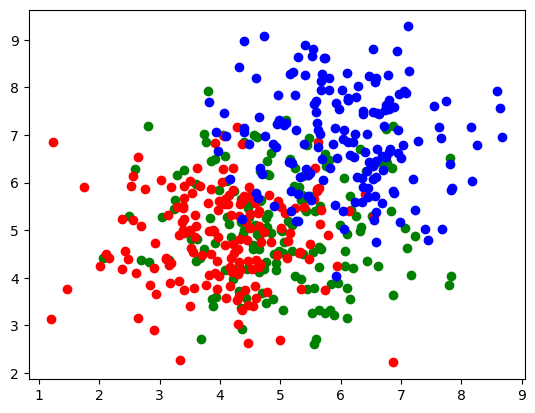

In [18]:
#centro de massa da distribuição
centers = [[5, 5], [4, 5], [6, 7]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=500, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)


print(data.shape, labels.shape)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)




#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))

ax.legend(loc='upper right')

plt.show()
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(predicts, test_labels)
print(f'\nAcc: {acc}\n')

print(classification_report(test_labels,predicts))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))


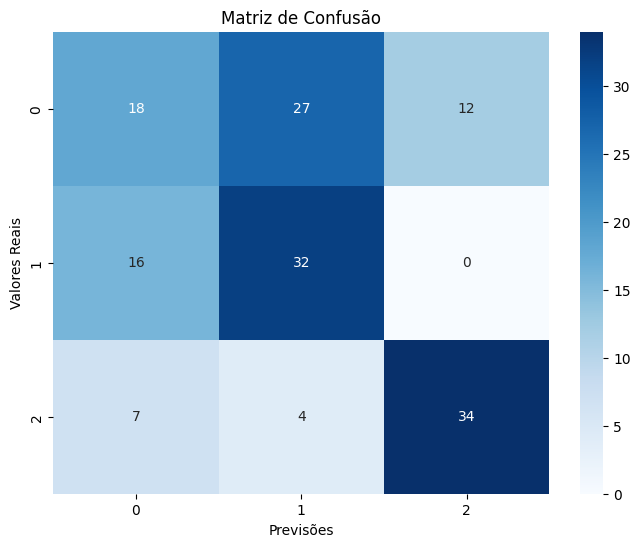

In [19]:
# prompt: gere a matriz de confusão

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (código anterior)

# Gere a matriz de confusão
cm = confusion_matrix(test_labels, predicts)

# Plote a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

# Classificação de Bases Reais

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [10]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import pandas as pd

df = load_wine(as_frame=True).frame

df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
df.sample(frac=1).head(15)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0,2
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0,2
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0,2
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,2


In [13]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

def reduce_and_visualize(data,labels,n_dims=2,size=(6,4)):
  pca = PCA(n_components=n_dims)
  X_pca = pca.fit_transform(data)

  plt.figure(figsize=size)

  if n_dims == 2:

    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('PCA - Visualização em 2D')
    plt.show()
  else:
    # Criar um DataFrame com os componentes principais e rótulos
    df_pca = pd.DataFrame(X_pca, columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3'])
    df_pca['Rótulo'] = labels

    # Criar o gráfico 3D
    fig = px.scatter_3d(df_pca, x='Componente Principal 1', y='Componente Principal 2', z='Componente Principal 3',
                        color='Rótulo', title='PCA - Visualização em 3D',
                        labels={'Componente Principal 1': 'Componente Principal 1',
                                'Componente Principal 2': 'Componente Principal 2',
                                'Componente Principal 3': 'Componente Principal 3'})

    # Exibir o gráfico
    fig.show()


(569, 30) (569,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0


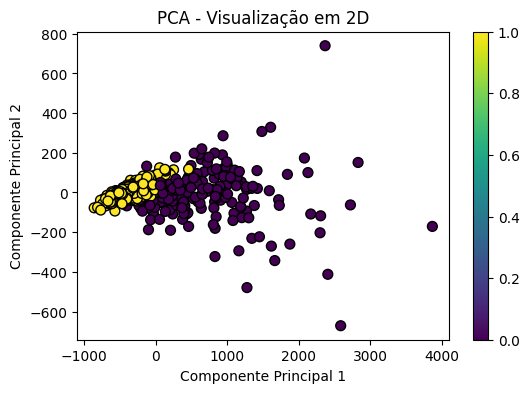

In [14]:
#Carrego a base como vetores numpy
data,labels = load_breast_cancer(return_X_y=True)
print(data.shape, labels.shape)

print(data[0],labels[0])
#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

reduce_and_visualize(data,labels,n_dims=2)

In [15]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_jobs=1,
                           n_neighbors=5)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(test_labels,predicts)
print(f'\nAcc: {acc}\n')

print(classification_report(test_labels,predicts ))


Acc: 0.9415204678362573

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.96      0.96      0.96       118

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



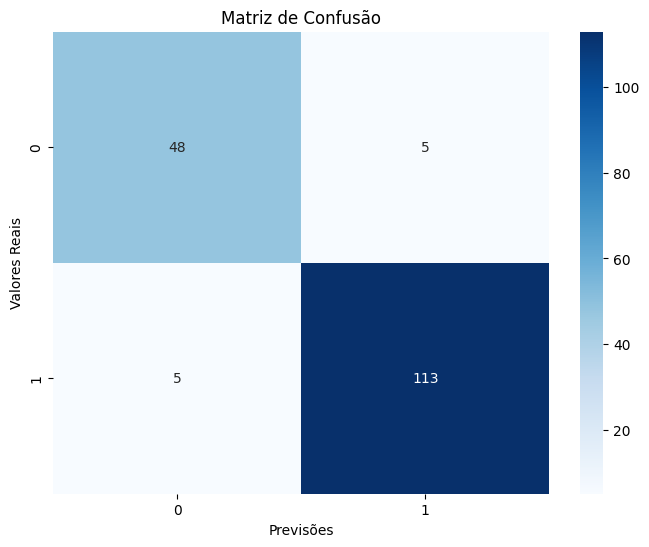

In [16]:
# prompt: gere a matriz de confusão

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (código anterior)

# Gere a matriz de confusão
cm = confusion_matrix(test_labels, predicts)

# Plote a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()


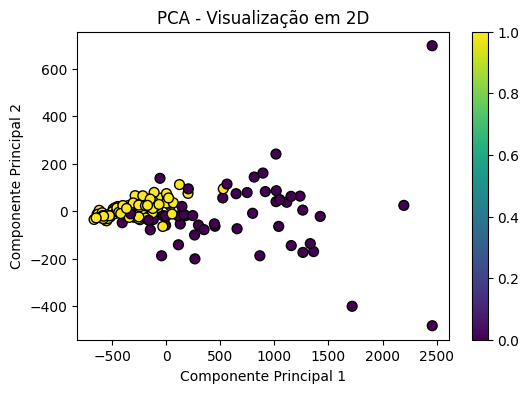

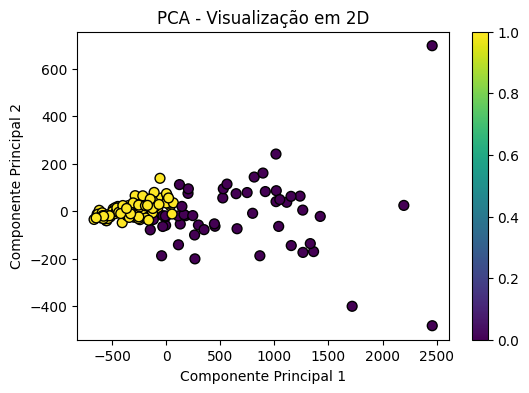

In [17]:
reduce_and_visualize(test_data,test_labels,n_dims=2)
reduce_and_visualize(test_data,predicts,n_dims=2)